In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns 
import upsetplot as up
from ast import literal_eval
from tqdm.auto import tqdm 
tqdm.pandas()
from sklearn.decomposition import PCA
from scipy.stats import linregress

In [2]:
# make a background distribuiton
def get_simulated_pc_var(corr_part, num_samples, num_repeats=100, num_genes=2):
    pc_var = []
    for i in tqdm(range(num_repeats), total=num_repeats):
        gene_pc_var = []
        corr = np.random.normal(0, 1, num_samples)
        Xs = []
        for j in range(num_genes):
            Xs.append((1-corr_part) * np.random.normal(0, 1, num_samples) + corr_part * corr)

        # fit PCA
        pca = PCA(n_components=num_genes).fit(np.column_stack(Xs))
        X_transform = pca.transform(np.column_stack(Xs))

        # var expalined by the first PC

        for pc_idx in range(num_genes):
            pc_var_cluster = []
            for gene_idx in range(num_genes):
                slope, intercept, r_value, p_value, std_err = linregress(X_transform[:,pc_idx], Xs[gene_idx])
                pc_var_cluster.append(r_value**2)
            gene_pc_var.append(pc_var_cluster)
        pc_var.append(gene_pc_var)
    pc_var = np.asarray(pc_var)
    return pc_var


  0%|          | 0/100 [00:00<?, ?it/s]

(0.0, 1.0)

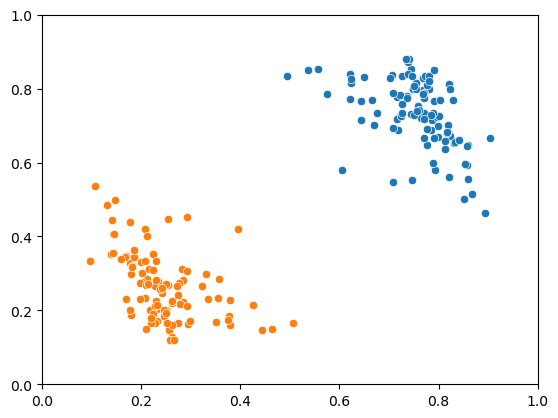

In [7]:
pc_var = get_simulated_pc_var(.5, 100)
pc1_var = pc_var[:,0]
pc2_var = pc_var[:,1]


ax = sns.scatterplot(x=np.asarray(pc1_var)[:,0], y=np.asarray(pc1_var)[:,1])
sns.scatterplot(x=np.asarray(pc2_var)[:,0], y=np.asarray(pc2_var)[:,1], ax=ax)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot: ylabel='Count'>

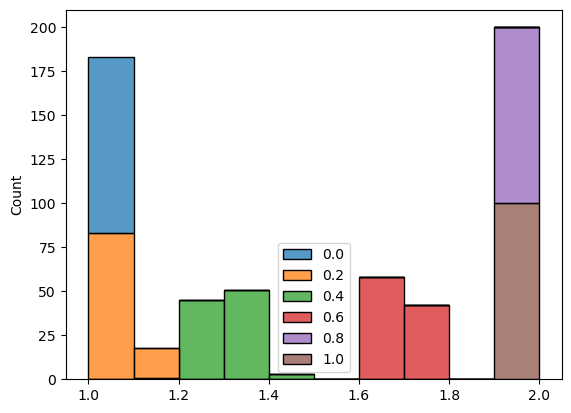

In [8]:
# sum of var expalined for 2 genes
sum_pc1_var=[]
corr_parts = [0, .2, .4, .6, .8, 1]
for corr_part in corr_parts:
    pc_var = get_simulated_pc_var(corr_part, 500)
    sum_pc1_var.append(np.asarray(pc_var[:,0]).sum(axis=1))

sum_pc1_var = pd.DataFrame(np.asarray(sum_pc1_var).T, columns=corr_parts)
sns.histplot(sum_pc1_var, bins=10, multiple='stack')


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot: ylabel='Count'>

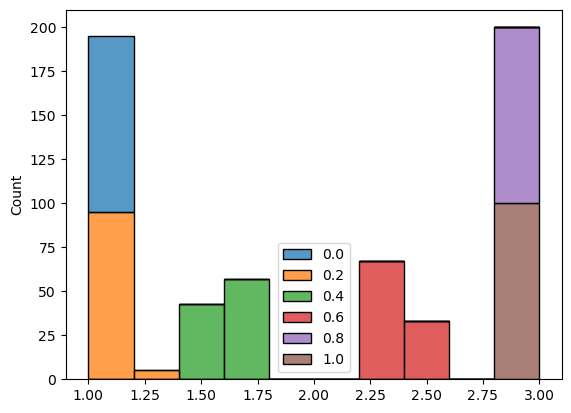

In [9]:
# sum of var expalined for 3 genes
sum_pc1_var=[]
corr_parts = [0, .2, .4, .6, .8, 1]
for corr_part in corr_parts:
    pc_var = get_simulated_pc_var(corr_part, 500, num_genes=3)
    sum_pc1_var.append(np.asarray(pc_var[:,0]).sum(axis=1))

sum_pc1_var = pd.DataFrame(np.asarray(sum_pc1_var).T, columns=corr_parts)
sns.histplot(sum_pc1_var, bins=10, multiple='stack')

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

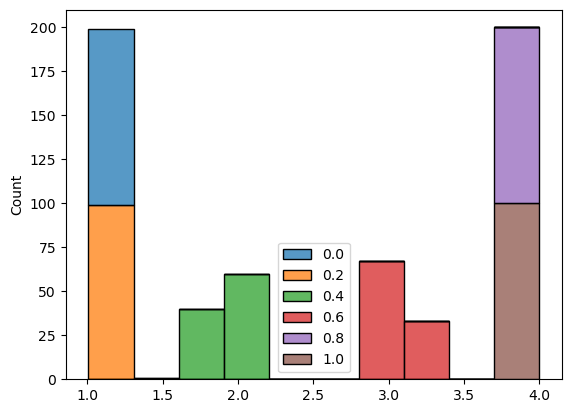

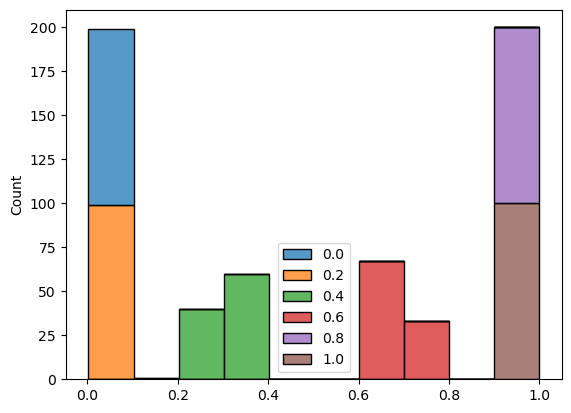

In [10]:
# sum of var expalined for 4 genes
sum_pc1_var=[]
corr_parts = [0, .2, .4, .6, .8, 1]
for corr_part in corr_parts:
    pc_var = get_simulated_pc_var(corr_part, 500, num_genes=4)
    sum_pc1_var.append(np.asarray(pc_var[:,0]).sum(axis=1))

sum_pc1_var = pd.DataFrame(np.asarray(sum_pc1_var).T, columns=corr_parts)
sns.histplot(sum_pc1_var, bins=10, multiple='stack')
plt.show()

sns.histplot((sum_pc1_var-1)/(4-1), bins=10, multiple='stack')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

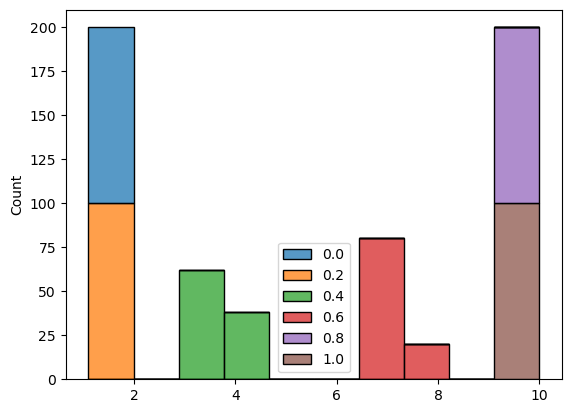

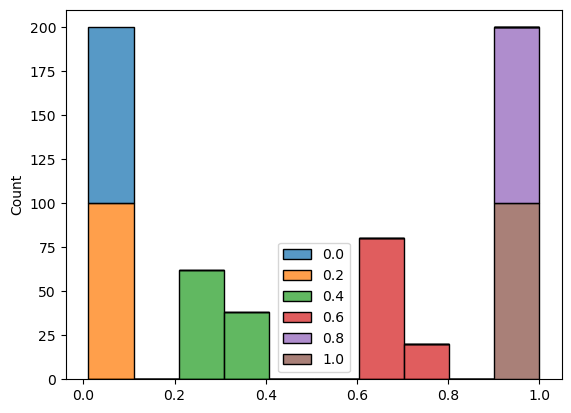

In [11]:
# sum of var expalined for 10 genes
sum_pc1_var=[]
corr_parts = [0, .2, .4, .6, .8, 1]
for corr_part in corr_parts:
    pc_var = get_simulated_pc_var(corr_part, 500, num_genes=10)
    sum_pc1_var.append(np.asarray(pc_var[:,0]).sum(axis=1))

sum_pc1_var = pd.DataFrame(np.asarray(sum_pc1_var).T, columns=corr_parts)
sns.histplot(sum_pc1_var, bins=10, multiple='stack')
plt.show()

sns.histplot((sum_pc1_var-1)/(10-1), bins=10, multiple='stack')
plt.show()